In [4]:
#loading initial libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# loading the dataset
from sklearn.datasets import load_breast_cancer

In [15]:
data = load_breast_cancer()

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [20]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [27]:
breast_cancer_df = pd.DataFrame(data.data,columns=data.feature_names)

In [28]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [34]:
# defining x and y
x = data.data
y = data.target

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state= 2529) 

In [36]:
model = LogisticRegression()

In [37]:
model.fit(x_train,y_train)

C:\Users\mahsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
log_odds = model.intercept_ + model.coef_ * x_test

In [39]:
print(log_odds)

[[24.98938855  1.01627093  4.48606732 ...  0.30288111  0.2495684
   0.32907543]
 [31.60094162  1.20862222  5.67500595 ...  0.27639397  0.25336726
   0.3268678 ]
 [22.99408609  1.35811804  4.23736301 ...  0.2625882   0.21816235
   0.32535276]
 ...
 [20.13640714  1.1054701   3.63827176 ...  0.30758504  0.24501633
   0.32837732]
 [33.69770014  1.32323569  6.08877948 ...  0.24636287  0.24554031
   0.32362128]
 [20.50841269  1.4084483   3.70429945 ...  0.30978044  0.25572517
   0.32770038]]


In [46]:
y_predicted = model.predict(x_test)
y_predicted

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1])

In [47]:
model.predict_proba(x_test)

array([[1.91013230e-01, 8.08986770e-01],
       [9.99999855e-01, 1.44812768e-07],
       [9.89744597e-01, 1.02554030e-02],
       [4.47689031e-02, 9.55231097e-01],
       [9.99999999e-01, 1.37612290e-09],
       [2.47320036e-02, 9.75267996e-01],
       [9.99742054e-01, 2.57946420e-04],
       [4.32915744e-03, 9.95670843e-01],
       [9.99909825e-01, 9.01746421e-05],
       [1.06809797e-03, 9.98931902e-01],
       [5.16729485e-02, 9.48327052e-01],
       [6.26099934e-01, 3.73900066e-01],
       [1.45739809e-02, 9.85426019e-01],
       [9.99999937e-01, 6.26287969e-08],
       [1.25180134e-02, 9.87481987e-01],
       [3.04642228e-03, 9.96953578e-01],
       [5.68254435e-01, 4.31745565e-01],
       [4.41922774e-03, 9.95580772e-01],
       [9.99999179e-01, 8.21431250e-07],
       [6.52586607e-02, 9.34741339e-01],
       [3.84511704e-01, 6.15488296e-01],
       [7.37871546e-04, 9.99262128e-01],
       [4.14961010e-03, 9.95850390e-01],
       [1.07735128e-02, 9.89226487e-01],
       [2.555977

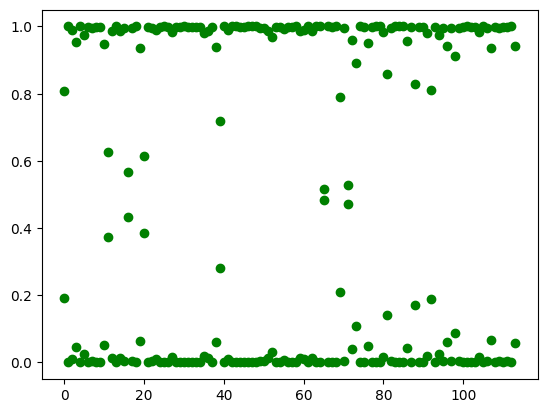

In [52]:
#modeling prediction
plt.plot(model.predict_proba(x_test),'o', color = "g")
y_predicted = model.predict(x_test)
plt.show()

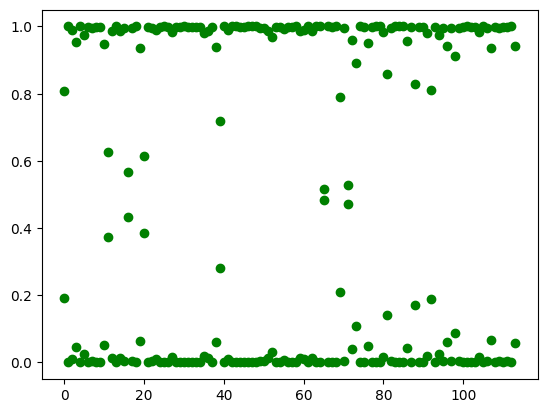

In [54]:
plt.plot(model.predict_proba(x_test),'o', color = "g")

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 

In [62]:
CM = metrics.confusion_matrix(y_test,y_predicted, labels=[0,1])
print(CM)

[[45  3]
 [ 2 64]]


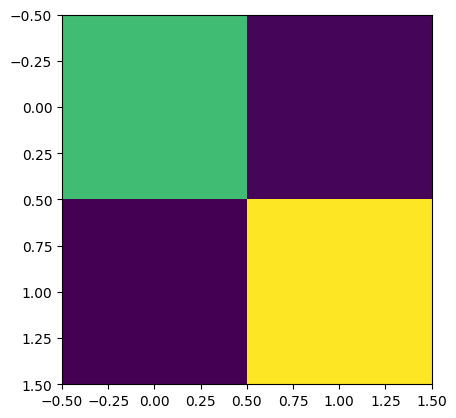

In [66]:
plt.imshow(CM)


In [74]:
#accuracy
#precision
#recall or sensibility= all true positive answers
#specifity=  all true negative 
#F1-score= precision and recall, positive 